In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv("Salary_Data.csv")

In [92]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [93]:
df.describe()   #statistics

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [94]:
df.info()  #looking at our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [95]:
sns.pairplot?

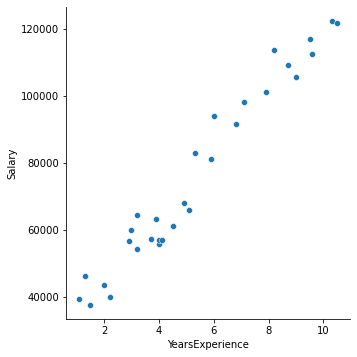

In [96]:
sns.pairplot(df,x_vars = "YearsExperience", y_vars = "Salary", kind = 'scatter',height = 5)

In [97]:
X = df['YearsExperience']
Y = df['Salary']

In [98]:
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [99]:
Y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.7,random_state = 100)

In [102]:
X_train

17     5.3
22     7.9
11     4.0
4      2.2
29    10.5
0      1.1
1      1.3
18     5.9
14     4.5
19     6.0
21     7.1
2      1.5
20     6.8
10     3.9
16     5.1
15     4.9
23     8.2
7      3.2
3      2.0
24     8.7
8      3.2
Name: YearsExperience, dtype: float64

In [103]:
X_test

9      3.7
26     9.5
28    10.3
13     4.1
5      2.9
12     4.0
27     9.6
25     9.0
6      3.0
Name: YearsExperience, dtype: float64

In [104]:
Y_train

17     83088.0
22    101302.0
11     55794.0
4      39891.0
29    121872.0
0      39343.0
1      46205.0
18     81363.0
14     61111.0
19     93940.0
21     98273.0
2      37731.0
20     91738.0
10     63218.0
16     66029.0
15     67938.0
23    113812.0
7      54445.0
3      43525.0
24    109431.0
8      64445.0
Name: Salary, dtype: float64

In [105]:
Y_test

9      57189.0
26    116969.0
28    122391.0
13     57081.0
5      56642.0
12     56957.0
27    112635.0
25    105582.0
6      60150.0
Name: Salary, dtype: float64

In [106]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lr = LinearRegression()


In [109]:
lr.fit(X_train,Y_train)

LinearRegression()

What is Xtest and Ytest?
x_test is the test data set. y_test is the set of labels to all the data in x_test .

In [110]:
Y_test = Y_test.values.reshape(-1,1)

In [117]:
x_pred = lr.predict(X_test)


In [118]:
x_pred

array([ 61208.34198766, 117649.32424949, 125434.28732008,  65100.82352296,
        53423.37891707,  64127.70313914, 118622.44463331, 112783.72233036,
        54396.49930089])

In [119]:
len(X_test)

9

In [120]:
len(Y_test)

9

In [126]:
x_range =  [i for i in range(len(Y_test))]

In [127]:
x_range

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [130]:
exp = []
for i in x_range:
    exp.append(X_test[i][0])
exp

[3.7, 9.5, 10.3, 4.1, 2.9, 4.0, 9.6, 9.0, 3.0]

In [137]:
pred = []
for i in x_range:
    pred.append(x_pred[i])
pred

[61208.341987662774,
 117649.32424948596,
 125434.28732008227,
 65100.82352296092,
 53423.37891706647,
 64127.703139136385,
 118622.44463331049,
 112783.72233036326,
 54396.49930089101]

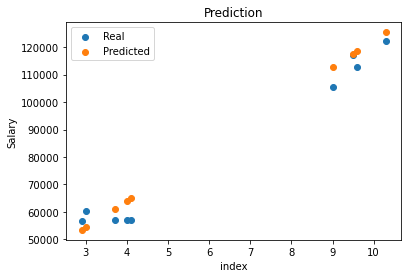

In [141]:
plt.xlabel('index')
plt.ylabel('Salary')
plt.title('Prediction')

plt.scatter(exp,Y_test)#original
plt.scatter(exp,pred) #predicted by our model

# Function add a legend  
plt.legend(["Real", "Predicted"])

In [142]:
lr.coef_

array([9731.20383825])

In [143]:
lr.intercept_

25202.887786154883

In [148]:
from sklearn.metrics import r2_score,mean_squared_error

In [149]:
mean_squared_error(Y_test,pred)

30310299.043402452

In [150]:
r2_score(Y_test,pred)

0.9627668685473267

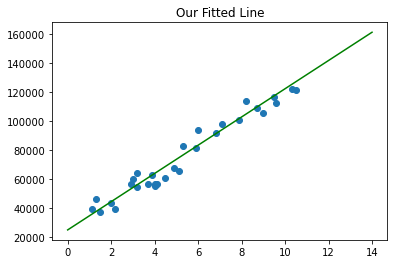

In [165]:
line = [lr.coef_*i+lr.intercept_ for i in range (15)]#y = mx+c
x = [i for i in range(15)]
plt.scatter(df['YearsExperience'],df['Salary'])

plt.plot(x, line, '-g')

plt.title('Our Fitted Line')
plt.show()

In [160]:
plt.plot?